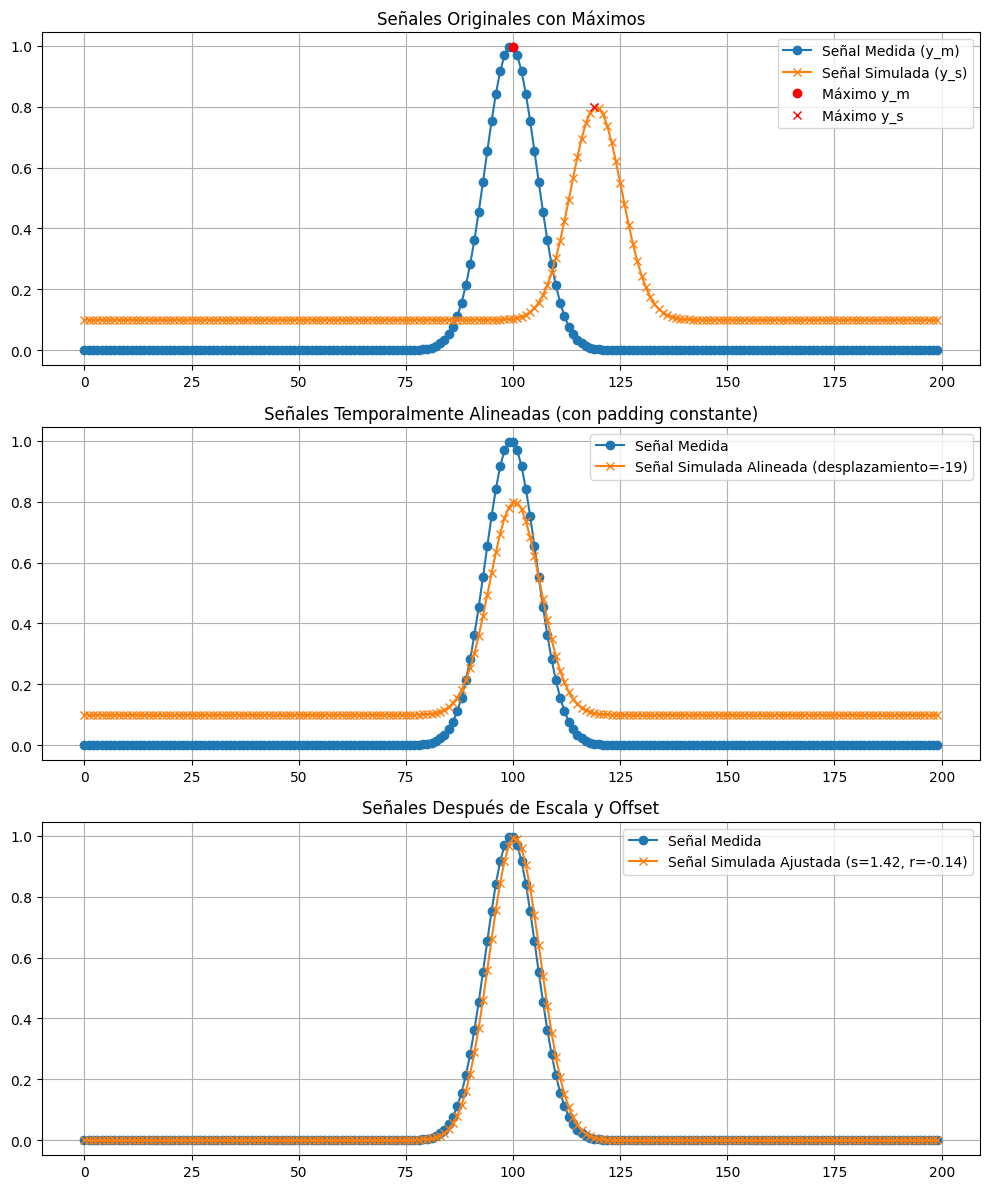

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import float64

def encontrar_max_cuadrado(y):
    """Encuentra el índice del máximo valor cuadrado de la señal."""
    return np.argmax(y**2)

def desplazar_senal_padding_constante(y, delta_idx):
    """
    Desplaza la señal y en el tiempo para alinear máximos.
    Rellena con el valor constante del borde (inicio o final) en lugar de ceros.
    
    Parámetros:
    y -- numpy array, señal
    delta_idx -- entero, número de muestras a desplazar (+ hacia la derecha)
    
    Retorna:
    y_desplazada -- señal desplazada con padding constante, misma longitud que y
    """
    N = len(y)
    y_desplazada = np.empty_like(y)

    if delta_idx > 0:
        # Desplazar a la derecha: rellenar inicio con valor inicial
        y_desplazada[:delta_idx] = y[0]
        y_desplazada[delta_idx:] = y[:N - delta_idx]
    elif delta_idx < 0:
        # Desplazar a la izquierda: rellenar final con valor final
        y_desplazada[:N + delta_idx] = y[-delta_idx:]
        y_desplazada[N + delta_idx:] = y[-1]
    else:
        y_desplazada = y.copy()

    return y_desplazada

def calcular_escala_offset(y_m, y_s):
    """Calcula escala y offset minimizando error L2."""
    T = len(y_m)

    A = np.sum(y_s ** 2)
    B = np.sum(y_s)
    C = np.sum(y_m * y_s)
    D = np.sum(y_m)

    M = np.array([[A, B],
                  [B, T]])
    V = np.array([C, D])

    s, r = np.linalg.solve(M, V)

    return s, r

# --- Código principal ---
if __name__ == "__main__":
    # Señal medida: un pulso gaussiano
    t = np.linspace(0, 1, 200)
    y_m = np.exp(-((t - 0.5) ** 2) / (2 * 0.03 ** 2))

    # Señal simulada: misma forma, desplazada, escalada y con offset
    desplazamiento_muestras = 20  # 20 muestras hacia la derecha
    escala_real = 0.7
    offset_real = 0.1
    y_s = np.exp(-((t - 0.5 - 0.1) ** 2) / (2 * 0.03 ** 2))  # desplazada 0.1 en tiempo (aprox 20 muestras)
    y_s = escala_real * y_s + offset_real
    
    

    # Encontrar índices máximos de y^2
    idx_max_m = encontrar_max_cuadrado(y_m)
    idx_max_s = encontrar_max_cuadrado(y_s)

    # Calcular desplazamiento necesario para alinear máximos
    delta_idx = idx_max_m - idx_max_s

    # Desplazar la señal simulada con padding constante para mantener longitud
    y_s_alineada = desplazar_senal_padding_constante(y_s, delta_idx)

    # La señal medida no cambia
    y_m_alineada = y_m.copy()

    # Calcular escala y offset
    s, r = calcular_escala_offset(y_m_alineada, y_s_alineada)

    # Aplicar transformación
    y_s_ajustada = s * y_s_alineada + r

    # --- Gráficos ---
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # 1. Señales originales con máximos
    axs[0].plot(y_m, label='Señal Medida (y_m)', marker='o')
    axs[0].plot(y_s, label='Señal Simulada (y_s)', marker='x')
    axs[0].plot(idx_max_m, y_m[idx_max_m], 'ro', label='Máximo y_m')
    axs[0].plot(idx_max_s, y_s[idx_max_s], 'rx', label='Máximo y_s')
    axs[0].set_title('Señales Originales con Máximos')
    axs[0].legend()
    axs[0].grid()

    # 2. Señales temporalmente alineadas (desplazamiento con padding constante)
    axs[1].plot(y_m_alineada, label='Señal Medida', marker='o')
    axs[1].plot(y_s_alineada, label=f'Señal Simulada Alineada (desplazamiento={delta_idx})', marker='x')
    axs[1].set_title('Señales Temporalmente Alineadas (con padding constante)')
    axs[1].legend()
    axs[1].grid()

    # 3. Señales después de escala y offset
    axs[2].plot(y_m_alineada, label='Señal Medida', marker='o')
    axs[2].plot(y_s_ajustada, label=f'Señal Simulada Ajustada (s={s:.2f}, r={r:.2f})', marker='x')
    axs[2].set_title('Señales Después de Escala y Offset')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()


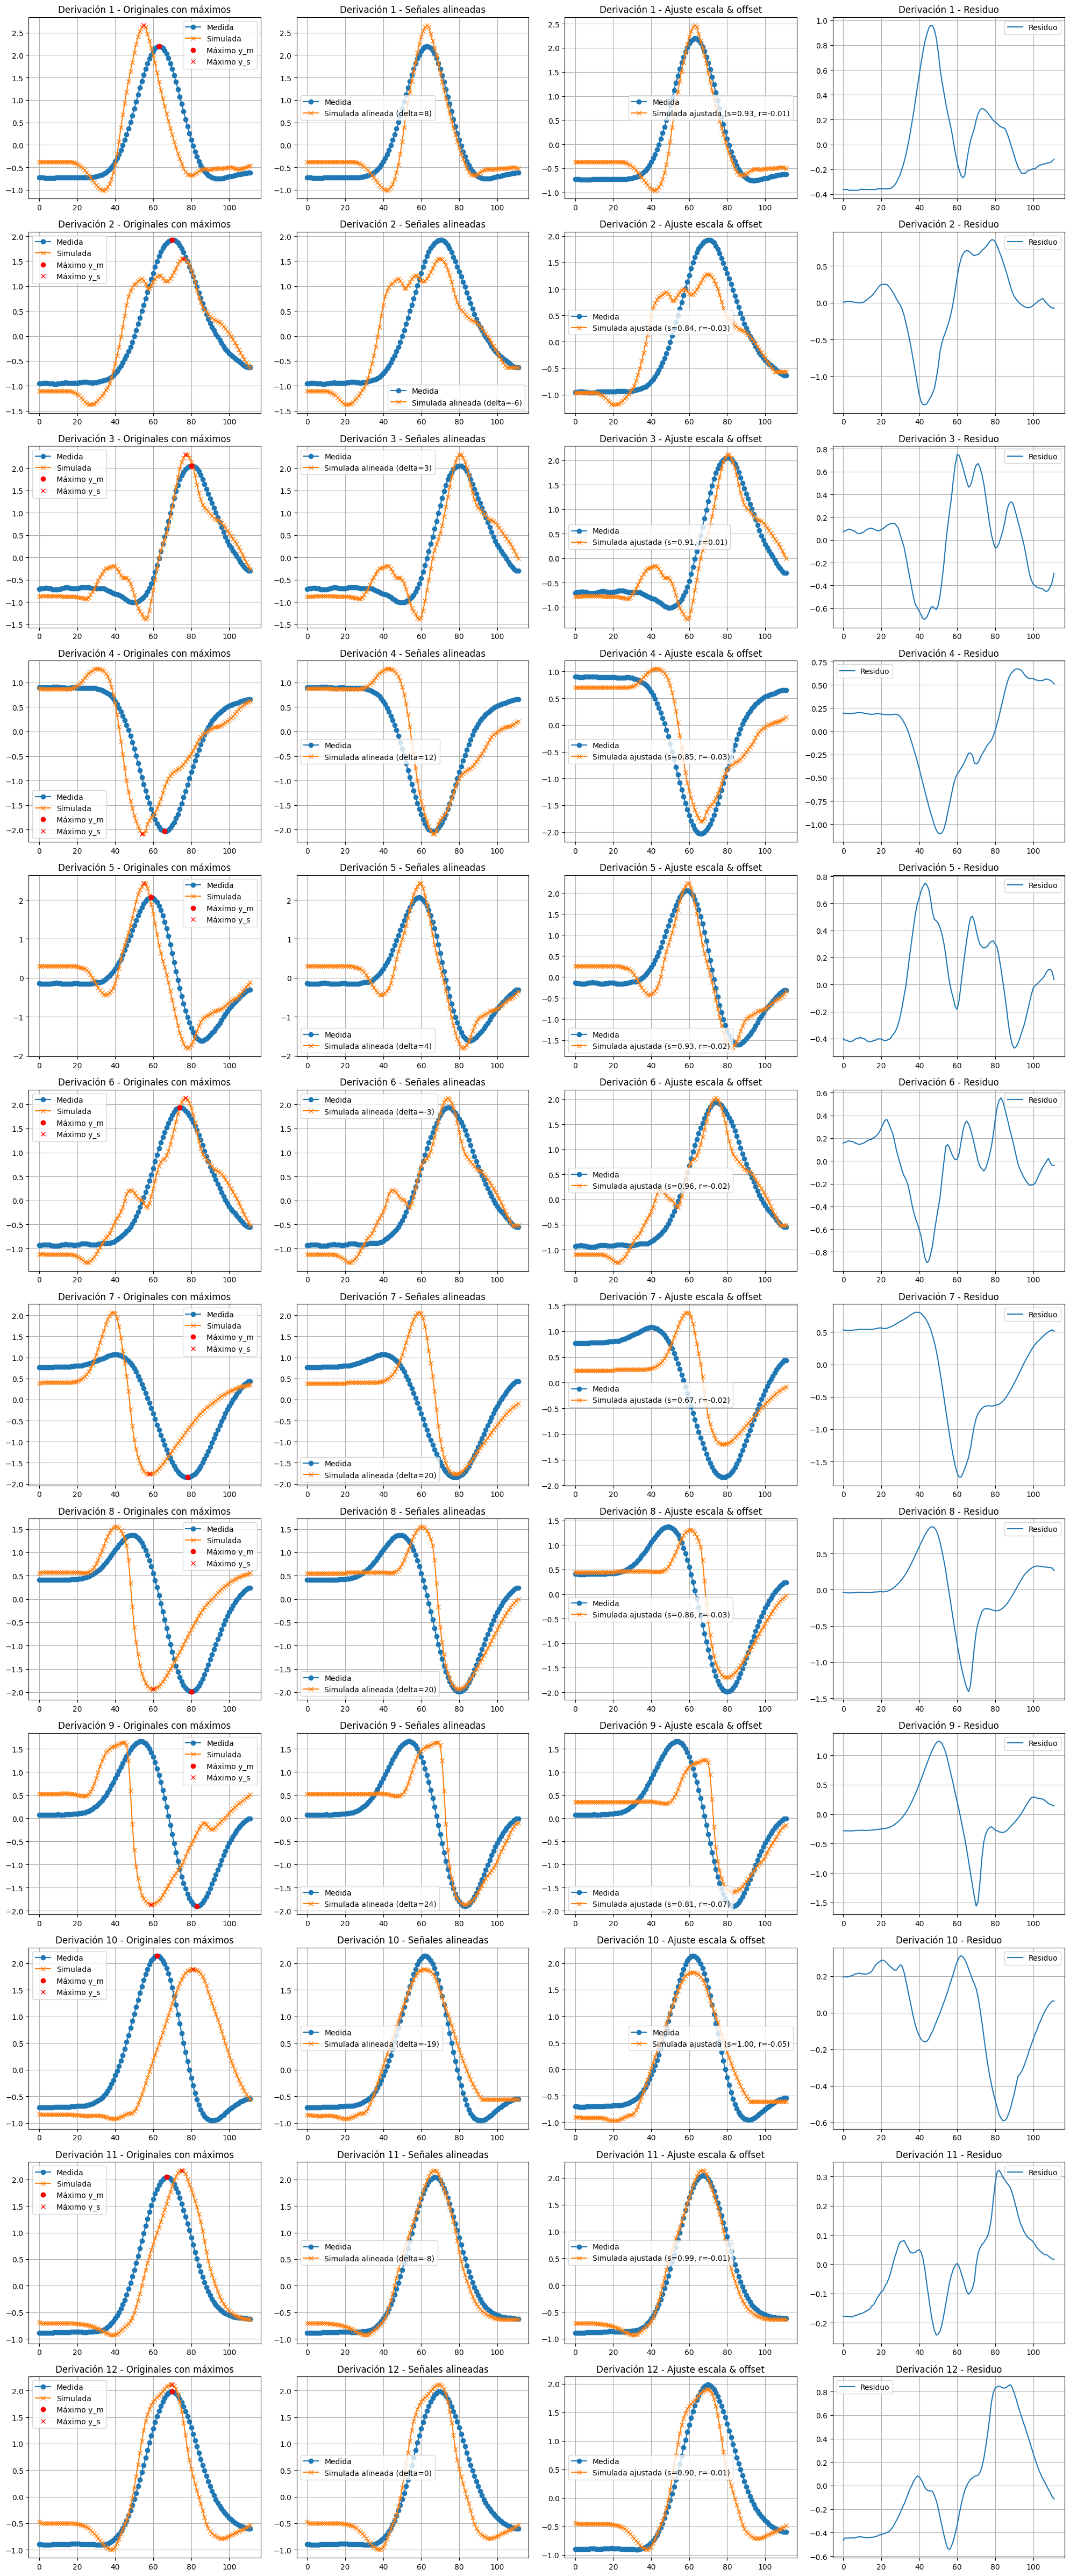

Mejor tupla global (delta, escala, offset): (np.int64(4), np.float64(0.9271621867026699), np.float64(-0.019657743994053397))
Error mínimo sumado: 80.0740


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def encontrar_max_cuadrado(y):
    """Encuentra el índice del máximo valor cuadrado de la señal."""
   
    return  np.argmax((y - y[0])**2)

def desplazar_senal_padding_constante(y, delta_idx):
    """
    Desplaza la señal y en el tiempo para alinear máximos.
    Rellena con el valor constante del borde (inicio o final) en lugar de ceros.
    
    Parámetros:
    y -- numpy array, señal 1D
    delta_idx -- entero, número de muestras a desplazar (+ hacia la derecha)
    
    Retorna:
    y_desplazada -- señal desplazada con padding constante, misma longitud que y
    """
    N = len(y)
    y_desplazada = np.empty_like(y)

    if delta_idx > 0:
        # Desplazar a la derecha: rellenar inicio con valor inicial
        y_desplazada[:delta_idx] = y[0]
        y_desplazada[delta_idx:] = y[:N - delta_idx]
    elif delta_idx < 0:
        # Desplazar a la izquierda: rellenar final con valor final
        y_desplazada[:N + delta_idx] = y[-delta_idx:]
        y_desplazada[N + delta_idx:] = y[-1]
    else:
        y_desplazada = y.copy()

    return y_desplazada

def calcular_escala_offset(y_m, y_s):
    """Calcula escala y offset minimizando error L2."""
    T = len(y_m)

    A = np.sum(y_s ** 2)
    B = np.sum(y_s)
    C = np.sum(y_m * y_s)
    D = np.sum(y_m)

    M = np.array([[A, B],
                  [B, T]])
    V = np.array([C, D])

    s, r = np.linalg.solve(M, V)

    return s, r


def evaluar_tuplas_globalmente(y_m, y_s, deltas, escalas, offsets):
    """
    Evalúa cada triplete (delta, escala, offset) aplicado a todas las derivaciones simuladas,
    calcula la suma de normas L2 de residuos y devuelve la tupla que minimiza esa suma.
    
    Parámetros:
    y_m -- matriz (T,L) señal medida
    y_s -- matriz (T,L) señal simulada original (sin alinear ni ajustar)
    deltas -- array (L,) de desplazamientos por derivación
    escalas -- array (L,) de escalas por derivación
    offsets -- array (L,) de offsets por derivación
    
    Retorna:
    mejor_tupla -- (delta, escala, offset) que minimiza la suma de normas L2
    min_error -- valor mínimo de la suma de normas L2
    """
    T, L = y_m.shape
    min_error = np.inf
    mejor_tupla = None

    for i in range(L):
        delta = deltas[i]
        escala = escalas[i]
        offset = offsets[i]

        # Desplazamos todas las señales simuladas con el delta i
        y_s_desplazada = np.zeros_like(y_s)
        for j in range(L):
            y_s_desplazada[:, j] = desplazar_senal_padding_constante(y_s[:, j], delta)
        
        # Aplicamos escala y offset i a todas las derivaciones
        y_s_ajustada = escala * y_s_desplazada + offset

        # Calculamos el sumatorio de la norma L2 de los residuos
        error = 0
        for j in range(L):
            residuo = y_m[:, j] - y_s_ajustada[:, j]
            error += np.linalg.norm(residuo, 2)

        if error < min_error:
            min_error = error
            mejor_tupla = (delta, escala, offset)

    return mejor_tupla, min_error

 
def ecg_calcul(ecg_aiso):
    """
    Calcula las 12 derivaciones del ECG a partir del fichero ecg_aiso con los potenciales
    proporcionados por elvira, sin normalizar los resultados.
    
    Parámetros:
    ecg_aiso : str - Ruta al archivo de potenciales
    
    Retorna:
    numpy.ndarray - Matriz con las 12 derivaciones del ECG sin normalizar
    """
    # Cargar el archivo de datos
    ecg_elvira = np.loadtxt(ecg_aiso, skiprows=1)

    # Crear un array vacío para almacenar las derivaciones
    ECG = np.zeros((ecg_elvira.shape[0], 13))

    # Asignar la primera columna como el tiempo
    ECG[:, 0] = ecg_elvira[:, 0]

    # Cálculo de las derivaciones estándar
    ECG[:, 1] = ecg_elvira[:, 7] - ecg_elvira[:, 8]  # I = LA - RA
    ECG[:, 2] = ecg_elvira[:, 9] - ecg_elvira[:, 8]  # II = LL - RA
    ECG[:, 3] = ecg_elvira[:, 9] - ecg_elvira[:, 7]  # III = LL - LA

    # Cálculo de las derivaciones aumentadas
    ECG[:, 4] = ecg_elvira[:, 8] - 0.5 * (ecg_elvira[:, 7] + ecg_elvira[:, 9])  # aVR = RA - (1/2)(LA + LL)
    ECG[:, 5] = ecg_elvira[:, 7] - 0.5 * (ecg_elvira[:, 8] + ecg_elvira[:, 9])  # aVL = LA - (1/2)(RA + LL)
    ECG[:, 6] = ecg_elvira[:, 9] - 0.5 * (ecg_elvira[:, 8] + ecg_elvira[:, 7])  # aVF = LL - (1/2)(RA + LA)

    # Cálculo de las derivaciones precordiales
    ECG[:, 7] = ecg_elvira[:, 1] - (1/3) * (ecg_elvira[:, 8] + ecg_elvira[:, 7] + ecg_elvira[:, 9])  # V1
    ECG[:, 8] = ecg_elvira[:, 2] - (1/3) * (ecg_elvira[:, 8] + ecg_elvira[:, 7] + ecg_elvira[:, 9])  # V2
    ECG[:, 9] = ecg_elvira[:, 3] - (1/3) * (ecg_elvira[:, 8] + ecg_elvira[:, 7] + ecg_elvira[:, 9])  # V3
    ECG[:, 10] = ecg_elvira[:, 4] - (1/3) * (ecg_elvira[:, 8] + ecg_elvira[:, 7] + ecg_elvira[:, 9])  # V4
    ECG[:, 11] = ecg_elvira[:, 5] - (1/3) * (ecg_elvira[:, 8] + ecg_elvira[:, 7] + ecg_elvira[:, 9])  # V5
    ECG[:, 12] = ecg_elvira[:, 6] - (1/3) * (ecg_elvira[:, 8] + ecg_elvira[:, 7] + ecg_elvira[:, 9])  # V6
    
    return ECG


def normalizar_señales(matriz):
    """
    Normaliza una matriz de señales ECG. Para cada señal (columna), 
    resta la media y divide por la desviación estándar, excepto la primera columna (tiempo).
    
    Parámetros:
    matriz : numpy.ndarray - Matriz de tamaño (n, 13), donde cada columna representa una señal.
        
    Retorna:
    numpy.ndarray - Matriz normalizada donde la primera columna queda intacta 
                    y las demás tienen media 0 y desviación estándar 1.
    """
    # Copiar la matriz original para no modificarla directamente
    matriz_normalizada = matriz.copy()

    # Calcular la media y la desviación estándar para cada columna (excepto la primera)
    media = np.mean(matriz[:, 1:], axis=0)
    desviacion_estandar = np.std(matriz[:, 1:], axis=0)

    # Evitar división por cero: si la desviación estándar es 0, reemplazar por 1
    desviacion_estandar[desviacion_estandar == 0] = 1  

    # Normalizar todas las columnas excepto la primera (tiempo)
    matriz_normalizada[:, 1:] = (matriz[:, 1:] - media) / desviacion_estandar

    return matriz_normalizada

# --- Código principal para señales multicanal ---
if __name__ == "__main__":
    '''
    # Simulamos señales multicanal: (T, L)
    T = 200
    L = 3  # número de derivaciones
    t = np.linspace(0, 1, T)

    # Señal medida: 3 pulsos gaussianos en diferentes posiciones
    y_m = np.zeros((T, L))
    centros = [0.3, 0.5, 0.7]
    for i in range(L):
        y_m[:, i] = np.exp(-((t - centros[i]) ** 2) / (2 * 0.03 ** 2))

    # Señal simulada: desplazada, escalada y con offset distinto para cada derivación
    desplazamientos_muestras = [15, 20, 10]  # diferentes desplazamientos
    escalas_reales = [0.7, 0.8, 0.6]
    offsets_reales = [0.1, 0.05, 0.08]
    y_s = np.zeros_like(y_m)
    for i in range(L):
        y_s[:, i] = np.exp(-((t - centros[i] - desplazamientos_muestras[i] * (t[1]-t[0])) ** 2) / (2 * 0.03 ** 2))
        y_s[:, i] = escalas_reales[i] * y_s[:, i] + offsets_reales[i]
    '''
    
    # Cargar datos
    y_m_raw = np.loadtxt('C:/Users/Sandra/Documents/temporal/ID4_ECG_filtrado.csv', delimiter=',')
    y_s_raw = ecg_calcul('C:/Users/Sandra/Documents/temporal/ecg_aiso.dat')

    #esto es hacer trampas...lo tengo así porque mi señal simulada es un desastre a nivel de amplitudes las precordiales salen mucho más grandes
    y_m=normalizar_señales(y_m_raw)
    y_s=normalizar_señales(y_s_raw)
    
    # Eliminar primera columna (tiempo)
    y_m = y_m[:, 1:]
    y_s = y_s[:, 1:]

    
    # Igualar longitudes con padding constante (último valor)
    long_max = max(y_m.shape[0], y_s.shape[0])

    if y_m.shape[0] < long_max:
        faltan = long_max - y_m.shape[0]
        pad_values = np.tile(y_m[-1, :], (faltan, 1))
        y_m = np.vstack([y_m, pad_values])

    if y_s.shape[0] < long_max:
        faltan = long_max - y_s.shape[0]
        pad_values = np.tile(y_s[-1, :], (faltan, 1))
        y_s = np.vstack([y_s, pad_values])

    
    L=y_m.shape[1] #numero derivaciones
    
    
    # Calculamos desplazamientos para cada derivación
    deltas = []
    for i in range(L):
        idx_max_m = encontrar_max_cuadrado(y_m[:, i])
        idx_max_s = encontrar_max_cuadrado(y_s[:, i])
        delta = idx_max_m - idx_max_s
        deltas.append(delta)
    deltas = np.array(deltas)

    # Desplazamos cada derivación simulada por separado
    y_s_alineada = np.zeros_like(y_s)
    for i in range(L):
        y_s_alineada[:, i] = desplazar_senal_padding_constante(y_s[:, i], deltas[i])

    # Calculamos escala y offset para cada derivación por separado
    escalas = []
    offsets = []
    y_s_ajustada = np.zeros_like(y_s)
    for i in range(L):
        s, r = calcular_escala_offset(y_m[:, i], y_s_alineada[:, i])
        escalas.append(s)
        offsets.append(r)
        y_s_ajustada[:, i] = s * y_s_alineada[:, i] + r
    escalas = np.array(escalas)
    offsets = np.array(offsets)

    # --- Gráficos ---
    fig, axs = plt.subplots(L, 4, figsize=(20, 4*L))
    for i in range(L):
        # Señales originales y máximos
        axs[i, 0].plot(y_m[:, i], label='Medida', marker='o')
        axs[i, 0].plot(y_s[:, i], label='Simulada', marker='x')
        idx_max_m = encontrar_max_cuadrado(y_m[:, i])
        idx_max_s = encontrar_max_cuadrado(y_s[:, i])
        axs[i, 0].plot(idx_max_m, y_m[idx_max_m, i], 'ro', label='Máximo y_m')
        axs[i, 0].plot(idx_max_s, y_s[idx_max_s, i], 'rx', label='Máximo y_s')
        axs[i, 0].set_title(f'Derivación {i+1} - Originales con máximos')
        axs[i, 0].legend()
        axs[i, 0].grid()

        # Señales alineadas temporalmente
        axs[i, 1].plot(y_m[:, i], label='Medida', marker='o')
        axs[i, 1].plot(y_s_alineada[:, i], label=f'Simulada alineada (delta={deltas[i]})', marker='x')
        axs[i, 1].set_title(f'Derivación {i+1} - Señales alineadas')
        axs[i, 1].legend()
        axs[i, 1].grid()

        # Señales después de escala y offset
        axs[i, 2].plot(y_m[:, i], label='Medida', marker='o')
        axs[i, 2].plot(y_s_ajustada[:, i], label=f'Simulada ajustada (s={escalas[i]:.2f}, r={offsets[i]:.2f})', marker='x')
        axs[i, 2].set_title(f'Derivación {i+1} - Ajuste escala & offset')
        axs[i, 2].legend()
        axs[i, 2].grid()

        # Residuo (error)
        residuo = y_m[:, i] - y_s_ajustada[:, i]
        axs[i, 3].plot(residuo, label='Residuo')
        axs[i, 3].set_title(f'Derivación {i+1} - Residuo')
        axs[i, 3].legend()
        axs[i, 3].grid()

    plt.tight_layout()
    plt.show()

    
    # --- Uso después de haber calculado deltas, escalas, offsets ---

    mejor_tupla, error_min = evaluar_tuplas_globalmente(y_m, y_s, deltas, escalas, offsets)
    print(f"Mejor tupla global (delta, escala, offset): {mejor_tupla}")
    print(f"Error mínimo sumado: {error_min:.4f}")


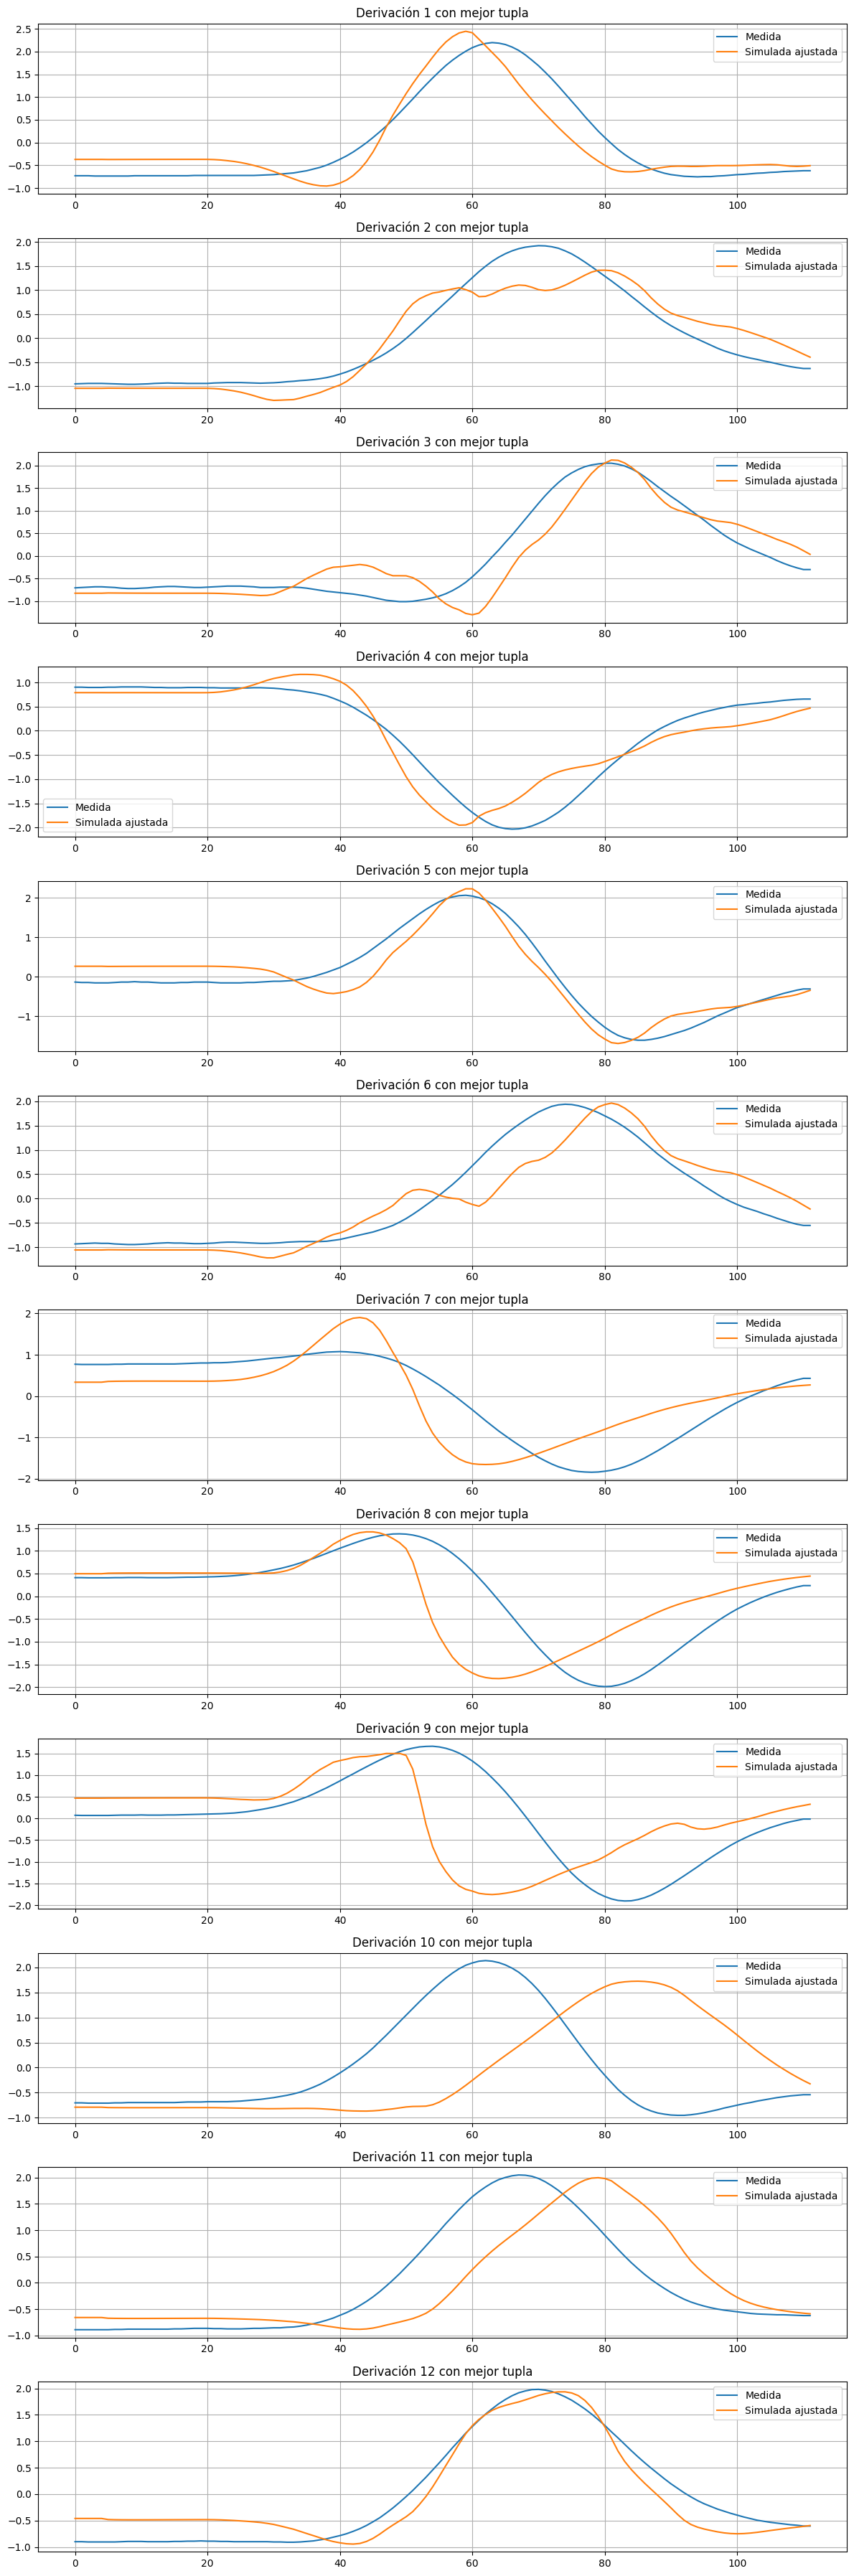

In [51]:
 # --- Gráfico final con la mejor tupla aplicada a todas las derivaciones ---
delta_best, escala_best, offset_best = mejor_tupla

# Desplazar todas las derivaciones con el mismo delta_best
y_s_best = np.zeros_like(y_s)
for j in range(L):
    y_s_best[:, j] = desplazar_senal_padding_constante(y_s[:, j], delta_best)

# Aplicar escala y offset globales
y_s_best = escala_best * y_s_best + offset_best

# Graficar todas las derivaciones

fig, axs = plt.subplots(L, 1, figsize=(12, 3*L))
if L == 1:
    axs = [axs]  # para manejar el caso de una sola derivación
for i in range(L):
    axs[i].plot(y_m[:, i], label='Medida')
    axs[i].plot(y_s_best[:, i], label='Simulada ajustada')
    axs[i].set_title(f'Derivación {i+1} con mejor tupla')
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()


In [44]:
print(escalas)

[ 0.93271418  0.84262948  0.91260585  0.84740334  0.92716219  0.95821325
 -0.2176064   0.86295281  0.8132428   0.99816918  0.99059914  0.90326547]


In [45]:
print(deltas)

[  8  -6   3  12   4  -3  39  20  24 -19  -8   0]


In [46]:
print(offsets)


[-0.01438609 -0.02704598  0.01407119 -0.03228165 -0.01965774 -0.02040372
  0.0443531  -0.02913115 -0.07449835 -0.05375299 -0.01050179 -0.00537628]


In [40]:
print(deltas)

[  8  -6   3  12   4  -3  20  20  24 -19  -8   0]


In [ ]:
from SALib.sample import sobol
import numpy as np

# Definir problema con 11 parámetros
problem = {
    'num_vars': 12,
    'names': ['x' + str(i) for i in range(12)],
    'bounds': [[0, 0.5]] * 12  # ejemplo de rango [0,1] para cada parámetro
}

# Número base de muestras
N = 250

# Generar muestras con Saltelli
param_values = sobol.sample(problem, N, calc_second_order=False)

print(f'Total muestras generadas: {param_values.shape[0]}')

print(param_values[0])

NameError: name 'sobol' is not defined

In [66]:
import math

def escala_a_paper(x):
    """Convierte un valor x en [0,1] a la escala [-π, π]."""
    return x * 2 * math.pi - math.pi

def paper_a_escala(y):
    """Convierte un valor y en [-π, π] a la escala [0,1]."""
    return (y + math.pi) / (2 * math.pi)


y_val = 1
x_val = paper_a_escala(y_val)
print(f"{y_val:.4f} radianes en [-π, π] equivale a {x_val:.4f} en [0,1]")


1.0000 radianes en [-π, π] equivale a 0.6592 en [0,1]


In [4]:

limits_uvc = {
    'ant_sept': {
        'ab': [0, 0.73],   # zona media-apical entre 30% y 50%
        'rt': [0.47, 0.78],    # zona septal anterior en rotacional (~0°-36°)
        'tv': 0
    },
    'ant_lv': {
        'ab': [0.1, 0.7],   
        'rt': [0.25, 0.7],   # anterior-lateral (~36°-90°)
        'tv': 0,
        'tm': 1
    },
    'post_lv': {
        'ab': [0.05, 0.7],   
        'rt': [0., 0.5],  # lateral-posterior (~90°-162°)
        'tv': 0,
        'tm': 1,
        'ts': 2
    },
    'sept_lv': {
        'ab': [0., 0.73],   
        'rt': [0.7, 1.0],   # septal izquierdo, final rotacional (~342°-360°)
        'tv': 0,
        'tm': 1,
        'ts': 2
    },
    'sept_rv': {
        'ab': [0., 0.73],   
        'rt': [0.7, 1.0],    # septal derecho (~324°-360°)
        'tv': 1,
        'tm': 1,
        'ts': 2
    },
    'mod_rv': {
        'ab': [0., 0.73],   
        'rt': [0.1, 0.6],    # moderador del RV (~252°-324°)
        'tv': 1,
        'tm': 1,
        'ts': 2
    },
    't_mod': {
        'time': [0, 25]    #preexcitacion banda moderadora
    }
}



num_vars=13
names_list=['ant_sept_ab','ant_lv_ab','post_lv_ab','sept_lv_ab','sept_rv_ab','mod_rv_ab','ant_sept_rt','ant_lv_rt','post_lv_rt','sept_lv_rt','sept_rv_rt','mod_rv_rt','t_mod']
bounds_list = []

for name in names_list:
    if name == 't_mod':
        bounds_list.append(limits_uvc['t_mod']['time'])
        continue
    # separar parte de la región y tipo de coordenada (_ab, _rt)
    region, coord = name.rsplit('_', 1)
    # extraer límites del diccionario limits_uvc
    bounds = limits_uvc[region][coord]
    bounds_list.append(bounds)

print(bounds_list)

[[0, 0.73], [0.1, 0.7], [0.05, 0.7], [0.0, 0.73], [0.0, 0.73], [0.0, 0.73], [0.47, 0.78], [0.25, 0.7], [0.0, 0.5], [0.7, 1.0], [0.7, 1.0], [0.1, 0.6], [0, 25]]


In [102]:
import vtk
from vtk.util import numpy_support
from pathlib import Path
import random
import math

from vtk.util.numpy_support import vtk_to_numpy

from typing import List

import json
from typing import Any, Optional

import pyvista as pv
import numpy as np
from scipy.spatial import cKDTree

import os
import shutil
import filecmp
import pickle
from SALib.sample import sobol

from scipy.stats import qmc

from SALib.util import scale_samples

def vtkWrite(data, filename):
    """
    Writes a VTK or VTU file from a vtkDataSet object.

    Parameters:
        data (vtk.vtkDataSet): The VTK data object to be written.
        filename (str): The output filename (should end in .vtk or .vtu).
    """
    if filename.endswith(".vtu"):
        writer = vtk.vtkXMLUnstructuredGridWriter()
    elif filename.endswith(".vtk"):
        writer = vtk.vtkUnstructuredGridWriter()
    else:
        raise ValueError("Unsupported file extension. Use .vtk or .vtu")

    writer.SetFileName(filename)

    # VTK writers often need casting
    if isinstance(data, vtk.vtkUnstructuredGrid):
        writer.SetInputData(data)
    else:
        raise TypeError("Only vtkUnstructuredGrid is supported in this function.")

    if writer.Write() == 1:
        print(f"File written successfully to {filename}")
    else:
        print("Failed to write the file.")

def smart_reader(path):

    """! Reads a mesh file in .vtk, .obj, .stl, .ply, .vtp or .vtu format.

    This function reads a vtk file for the structures.

    The vtk and pathlib libraries are needed.

    @param filepath The path to the file.

    @return  The mesh object.
    """
    valid_suffixes = ['.obj', '.stl', '.ply', '.vtk', '.vtp', '.vtu']
    path = Path(path)
    if path.suffix:
        ext = path.suffix.lower()
    if path.suffix not in valid_suffixes:
        print(f'No reader for this file suffix: {ext}')
        return None
    else:
        if ext == ".ply":
            reader = vtk.vtkPLYReader()
            reader.SetFileName(path)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".vtp":
            reader = vtk.vtkXMLPolyDataReader()
            reader.SetFileName(path)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".obj":
            reader = vtk.vtkOBJReader()
            reader.SetFileName(path)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".stl":
            reader = vtk.vtkSTLReader()
            reader.SetFileName(path)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".vtk":
            data_checker = vtk.vtkDataSetReader()
            data_checker.SetFileName(path)
            data_checker.Update()
            if data_checker.IsFilePolyData():
                reader = vtk.vtkPolyDataReader()
            elif data_checker.IsFileUnstructuredGrid():
                reader = vtk.vtkUnstructuredGridReader()
            else:
                return "No polydata or unstructured grid"
            reader.SetFileName(path)
            reader.Update()
            poly_data = reader.GetOutput()
        elif ext == ".vtu":
            reader = vtk.vtkXMLUnstructuredGridReader()
            reader.SetFileName(path)
            reader.Update()
            poly_data = reader.GetOutput()

        return poly_data
    



def threshold(mesh, low, high, point_data):
    """! Threshold a mesh.

    This function creates a new vtk mesh object that contais only 
    the points whithin the range between de low and high threshold.

    The vtk library is needed.

    @param mesh The mesh to threshold. It must be a vtk object with point data.
    @param low Lower threshold. The new mesh will only contain.
                points with the attribute to study higher than the low threshold.
    @param high Higher threshold. The new mesh will only contain points with the 
                attribute to study lower than the low threshold.
    @param point_data Attribute to study in every point of the mesh to decide if 
                the new mesh will contain that point.

    @return  The new vtk mesh object.
    """
    thresh = vtk.vtkThreshold()
    thresh.SetInputData(mesh)
    thresh.SetLowerThreshold(low)
    thresh.SetUpperThreshold(high)
    thresh.SetInputArrayToProcess(
        0, 0, 0, "vtkDataObject::FIELD_ASSOCIATION_POINTS", point_data)
    thresh.Update()

    return thresh.GetOutput()



def addGlobalIds(input_vtk):
    """
    Adds GlobalIds to points of a vtkPolyData using vtkIdFilter.
    
    Parameters:
        polydata (vtk.vtkPolyData): The input mesh.
    
    Returns:
        vtk.vtkPolyData: New mesh with point GlobalIds.
    """
    id_filter = vtk.vtkIdFilter()
    id_filter.SetInputData(input_vtk)
    id_filter.PointIdsOn()
    id_filter.CellIdsOff()
    id_filter.SetPointIdsArrayName("GlobalIds")  # <-- Correct method
    id_filter.Update()
    
    return id_filter.GetOutput()




def extract_surface(mesh):
    """! Extract surface of a mesh
     @param mesh The vtk mesh object
     @return surface The vtk surface mesh
    """
    surf_filter = vtk.vtkDataSetSurfaceFilter()
    surf_filter.SetInputData(mesh)
    surf_filter.Update()

    geomfilt = vtk.vtkGeometryFilter()
    geomfilt.SetInputData(surf_filter.GetOutput())
    geomfilt.Update()
    pdata = geomfilt.GetOutput()

    return pdata



def get_cobivecoaux(mesh, mesh_ids):
    """! Get the coordinates of the mesh ids.
    @param mesh_ids The mesh ids to get the coordinates.
    @return ab, tm, rt, tv, ts The coordinates of the mesh ids.
    """
    # Coordinates arrays
    ab = numpy_support.vtk_to_numpy(mesh.GetPointData().GetScalars("ab"))
    tm = numpy_support.vtk_to_numpy(mesh.GetPointData().GetScalars("tm")) 
    rt = numpy_support.vtk_to_numpy(mesh.GetPointData().GetScalars("rt"))
    tv = numpy_support.vtk_to_numpy(mesh.GetPointData().GetScalars("tv")) 
    ts = numpy_support.vtk_to_numpy(mesh.GetPointData().GetScalars("ts"))

    return ab[mesh_ids], tm[mesh_ids], rt[mesh_ids], tv[mesh_ids], ts[mesh_ids]





def Saltelli_sampler(num_vars, names_list, bounds_list, n, seed=None):

    problem = {
        'num_vars': num_vars,
        'names': names_list,
        'bounds': bounds_list
    }

    # Crear el generador Sobol con semilla opcional
    sobol_engine = qmc.Sobol(d=num_vars, scramble=True, seed=seed)

    # n debe ser potencia de 2 para random_base2
    # Ajustamos n al próximo entero para log2(n) si es necesario
    power = int(np.ceil(np.log2(n)))
    sample_size = 2**power

    # Generar muestras en [0,1]
    sample = sobol_engine.random_base2(m=power)

    # Escalar muestras a rangos
    param_values = scale_samples(sample, problem)

    print(f'Total muestras generadas: {param_values.shape[0]} (ajustado a potencia de 2)')

    return param_values





geom_path='C:/Users/Sandra/Documents/temporal/PSM1_1000_tetra_fibers_uvc.vtu'


vol_mesh = smart_reader(geom_path)
vol_mesh = addGlobalIds(vol_mesh)
surf_mesh = extract_surface(vol_mesh)
endo_rv = threshold(surf_mesh, 0.9, 1, 'tm')
endo_rv = threshold(endo_rv, 0.999, 1.01, 'tv')  # rango para atrapar valores ~1
endo_lv = threshold(surf_mesh, 0.9, 1, 'tm')
endo_lv = threshold(endo_lv, 0.0, 0.001, 'tv')  # rango para atrapar valores ~0

#sacar los ids de los endocardios y sus uvcs

ids_endo_rv = numpy_support.vtk_to_numpy(endo_rv.GetPointData().GetArray('GlobalIds'))
ids_endo_lv = numpy_support.vtk_to_numpy(endo_lv.GetPointData().GetArray('GlobalIds'))

ucoords_endo_rv = np.column_stack(get_cobivecoaux(vol_mesh, ids_endo_rv))
ucoords_endo_lv = np.column_stack(get_cobivecoaux(vol_mesh, ids_endo_lv))


#sacar las uvcs de los nodos de las disintas zonas

   


# Diccionario con límites aproximados de coordenadas UVC para cada región
# Cada límite es un tuple (min, max) para (longitudinal, circunferencial, radial)

limits_uvc = {
    'ant_sept_lv': {
        'ab': [0, 0.73],   # zona media-apical entre 30% y 50%
        'rt': [0.47, 0.78],    # zona septal anterior en rotacional (~0°-36°)
        'tv': [0.999, 1.01],
        'tm': [0.9, 1.0],
        'ts': [1.999, 2.01]
    },
    'ant_lv': {
        'ab': [0.1, 0.7],   
        'rt': [0.25, 0.7],   # anterior-lateral (~36°-90°)
        'tv': [0.999, 1.01],
        'tm': [0.9, 1.0],
        'ts': [1.999, 2.01]
    },
    'post_lv': {
        'ab': [0.05, 0.7],   
        'rt': [0., 0.4],  # lateral-posterior (~90°-162°)
        'tv': [0.999, 1.01],
        'tm': [0.9, 1.0],
        'ts': [1.999, 2.01]
    },
    'sept_lv': {
        'ab': [0., 0.73],   
        'rt': [0.7, 1.0],   # septal izquierdo, final rotacional (~342°-360°)
        'tv': [0.999, 1.01],
        'tm': [0.9, 1.0],
        'ts': [1.999, 2.01]
    },
    'sept_rv': {
        'ab': [0., 0.73],   
        'rt': [0.7, 1.0],    # septal derecho (~324°-360°)
        'tv': [0.0, 0.001],
        'tm': [0.9, 1.0],
        'ts': [1.999, 2.01]
    },
    'mod_rv': {
        'ab': [0., 0.73],   
        'rt': [0.1, 0.6],    # moderador del RV (~252°-324°)
        'tv': [0.0, 0.001],
        'tm': [0.9, 1.0],
        'ts': [1.999, 2.01]
    },
    't_mod': {
        'time': [0, 25]    #preexcitacion banda moderadora
    }
}


'''
vtkWrite(endo_lv,'C:/Users/Sandra/Documents/temporal/endo_lv.vtu') 
vtkWrite(endo_rv,'C:/Users/Sandra/Documents/temporal/endo_rv.vtu') 

#ant_sept
ant_sept = threshold(endo_lv, limits_uvc['ant_sept_lv']['ab'][0], limits_uvc['ant_sept_lv']['ab'][1], 'ab')
ant_sept = threshold(ant_sept, limits_uvc['ant_sept_lv']['rt'][0], limits_uvc['ant_sept_lv']['rt'][1], 'rt')
ant_sept = threshold(ant_sept, limits_uvc['ant_sept_lv']['ts'][0], limits_uvc['ant_sept_lv']['ts'][1], 'ts')

vtkWrite(ant_sept,'C:/Users/Sandra/Documents/temporal/ant_sept.vtu') 

#ant
ant = threshold(endo_lv, limits_uvc['ant_lv']['ab'][0], limits_uvc['ant_lv']['ab'][1], 'ab')
ant = threshold(ant, limits_uvc['ant_lv']['rt'][0], limits_uvc['ant_lv']['rt'][1], 'rt')
ant = threshold(ant, limits_uvc['ant_lv']['ts'][0], limits_uvc['ant_lv']['ts'][1], 'ts')

vtkWrite(ant,'C:/Users/Sandra/Documents/temporal/ant.vtu')

#post
post = threshold(endo_lv, limits_uvc['post_lv']['ab'][0], limits_uvc['post_lv']['ab'][1], 'ab')
post = threshold(post, limits_uvc['post_lv']['rt'][0], limits_uvc['post_lv']['rt'][1], 'rt')
post = threshold(post, limits_uvc['post_lv']['ts'][0], limits_uvc['post_lv']['ts'][1], 'ts')

vtkWrite(post,'C:/Users/Sandra/Documents/temporal/post.vtu')

#sept_lv
sept_lv = threshold(endo_lv, limits_uvc['sept_lv']['ab'][0], limits_uvc['sept_lv']['ab'][1], 'ab')
sept_lv = threshold(sept_lv, limits_uvc['sept_lv']['rt'][0], limits_uvc['sept_lv']['rt'][1], 'rt')
sept_lv = threshold(sept_lv, limits_uvc['sept_lv']['ts'][0], limits_uvc['sept_lv']['ts'][1], 'ts')

vtkWrite(sept_lv,'C:/Users/Sandra/Documents/temporal/sept_lv.vtu')

#sept_rv
sept_rv = threshold(endo_rv, limits_uvc['sept_rv']['ab'][0], limits_uvc['sept_rv']['ab'][1], 'ab')
sept_rv = threshold(sept_rv, limits_uvc['sept_rv']['rt'][0], limits_uvc['sept_rv']['rt'][1], 'rt')
sept_rv = threshold(sept_rv, limits_uvc['sept_rv']['ts'][0], limits_uvc['sept_rv']['ts'][1], 'ts')

vtkWrite(sept_rv,'C:/Users/Sandra/Documents/temporal/sept_rv.vtu')

#mod_rv
mod_rv = threshold(endo_rv, limits_uvc['mod_rv']['ab'][0], limits_uvc['mod_rv']['ab'][1], 'ab')
mod_rv = threshold(mod_rv, limits_uvc['mod_rv']['rt'][0], limits_uvc['mod_rv']['rt'][1], 'rt')
mod_rv = threshold(mod_rv, limits_uvc['mod_rv']['ts'][0], limits_uvc['mod_rv']['ts'][1], 'ts')

vtkWrite(mod_rv,'C:/Users/Sandra/Documents/temporal/mod_rv.vtu')

'''

num_vars=13
names_list=['ant_sept_lv_ab','ant_lv_ab','post_lv_ab','sept_lv_ab','sept_rv_ab','mod_rv_ab','ant_sept_lv_rt','ant_lv_rt','post_lv_rt','sept_lv_rt','sept_rv_rt','mod_rv_rt','t_mod']
bounds_list = []

for name in names_list:
    if name == 't_mod':
        bounds_list.append(limits_uvc['t_mod']['time'])
        continue
    # separar parte de la región y tipo de coordenada (_ab, _rt)
    region, coord = name.rsplit('_', 1)
    
    # extraer límites del diccionario limits_uvc
    bounds = limits_uvc[region][coord]
    bounds_list.append(bounds)

#print(bounds_list)

n = 250

samples=Saltelli_sampler(num_vars, names_list, bounds_list, n, seed=42)
      

points_uvc = [{} for _ in range(samples.shape[0])]

#samples=abx6  rtx6  timex1
for i in range(samples.shape[0]):
    points_uvc[i] = {
        'ant_sept_lv': {
            'ab': samples[i, 0],   # longitudinal
            'rt': samples[i, 6],   # rotacional
            'tv': 0,
            'tm': 1,
            'ts': 2
        },
        'ant_lv': {
            'ab': samples[i, 1],
            'rt': samples[i, 7],
            'tv': 0,
            'tm': 1,
            'ts': 2
        },
        'post_lv': {
            'ab': samples[i, 2],
            'rt': samples[i, 8],
            'tv': 0,
            'tm': 1,
            'ts': 2
        },
        'sept_lv': {
            'ab': samples[i, 3],
            'rt': samples[i, 9],
            'tv': 0,
            'tm': 1,
            'ts': 2
        },
        'sept_rv': {
            'ab': samples[i, 4],
            'rt': samples[i, 10],
            'tv': 1,
            'tm': 1,
            'ts': 2
        },
        'mod_rv': {
            'ab': samples[i, 5],
            'rt': samples[i, 11],
            'tv': 1,
            'tm': 1,
            'ts': 2
        },
        't_mod': {
            'time': samples[i, 12]
        }
    }


best_params_reshape = np.zeros((6, 6, samples.shape[0])) # ab tm rt tv ts time

for i,_ in enumerate(samples):
    best_params_reshape[0,:,i]=(points_uvc[i]['ant_sept_lv']['ab'],points_uvc[i]['ant_sept_lv']['tm'],points_uvc[i]['ant_sept_lv']['rt'],points_uvc[i]['ant_sept_lv']['tv'],points_uvc[i]['ant_sept_lv']['ts'],points_uvc[i]['t_mod']['time'])
    best_params_reshape[1,:,i]=(points_uvc[i]['ant_lv']['ab'],points_uvc[i]['ant_lv']['tm'],points_uvc[i]['ant_lv']['rt'],points_uvc[i]['ant_lv']['tv'],points_uvc[i]['ant_lv']['ts'],points_uvc[i]['t_mod']['time'])
    best_params_reshape[2,:,i]=(points_uvc[i]['post_lv']['ab'],points_uvc[i]['post_lv']['tm'],points_uvc[i]['post_lv']['rt'],points_uvc[i]['post_lv']['tv'],points_uvc[i]['post_lv']['ts'],points_uvc[i]['t_mod']['time'])
    best_params_reshape[3,:,i]=(points_uvc[i]['sept_lv']['ab'],points_uvc[i]['sept_lv']['tm'],points_uvc[i]['sept_lv']['rt'],points_uvc[i]['sept_lv']['tv'],points_uvc[i]['sept_lv']['ts'],points_uvc[i]['t_mod']['time'])
    best_params_reshape[4,:,i]=(points_uvc[i]['sept_rv']['ab'],points_uvc[i]['sept_rv']['tm'],points_uvc[i]['sept_rv']['rt'],points_uvc[i]['sept_rv']['tv'],points_uvc[i]['sept_rv']['ts'],points_uvc[i]['t_mod']['time'])
    best_params_reshape[5,:,i]=(points_uvc[i]['mod_rv']['ab'],points_uvc[i]['mod_rv']['tm'],points_uvc[i]['mod_rv']['rt'],points_uvc[i]['mod_rv']['tv'],points_uvc[i]['mod_rv']['ts'],0)

kdtree_path='C:/Users/Sandra/Documents/temporal/kdtree.pkl'

with open(kdtree_path, 'rb') as f:
    tree = pickle.load(f)


vol_mesh = smart_reader(geom_path)
vol_mesh = addGlobalIds(vol_mesh)


ids = numpy_support.vtk_to_numpy(vol_mesh.GetPointData().GetArray('GlobalIds'))



# Nombres de las regiones para los 7 puntos por individuo
region_names = ["ant_sept_lv", "ant_lv", "post_lv", "sept_lv", "sept_rv", "mod_rv"]

all_points = vtk.vtkPoints()
all_cells = vtk.vtkCellArray()

# Arrays para etiquetas
individuo_array = vtk.vtkIntArray()
individuo_array.SetName("Individuo")

region_array = vtk.vtkStringArray()
region_array.SetName("Region")

global_ids_output_array = vtk.vtkIntArray()
global_ids_output_array.SetName("GlobalIds")

for i in range(best_params_reshape.shape[2]):  # loop sobre muestras

    _, idx = tree.query(best_params_reshape[:, :5, i], k=1, workers=-1)
    global_ids_selected = idx
    
    #print(global_ids_selected)
    #print(best_params_reshape[:, :5, i])

    selected_ids_np = np.array(global_ids_selected, dtype=np.int64)
    vtk_id_array = numpy_support.numpy_to_vtk(selected_ids_np, deep=True, array_type=vtk.VTK_ID_TYPE)
    vtk_id_array.SetName("GlobalIds")

    selection_node = vtk.vtkSelectionNode()
    selection_node.SetFieldType(vtk.vtkSelectionNode.POINT)
    selection_node.SetContentType(vtk.vtkSelectionNode.INDICES)
    selection_node.SetSelectionList(vtk_id_array)

    selection = vtk.vtkSelection()
    selection.AddNode(selection_node)

    extract_selection = vtk.vtkExtractSelection()
    extract_selection.SetInputData(0, vol_mesh)
    extract_selection.SetInputData(1, selection)
   
    extract_selection.Update()

    selected_points = vtk.vtkUnstructuredGrid.SafeDownCast(extract_selection.GetOutput())

    global_ids_array = selected_points.GetPointData().GetArray('GlobalIds')

    
    


    if not global_ids_array:
        raise RuntimeError("No se encontró el array 'GlobalIds' en selected_points")

    for p in range(selected_points.GetNumberOfPoints()):
        coord = selected_points.GetPoint(p)
        global_id = global_ids_array.GetValue(p)

        # Buscar todos los índices donde aparece este global_id
        indices = np.where(selected_ids_np == global_id)[0]

        if len(indices) == 0:
            # No encontrado, agregar con región unknown (opcional)
            pid = all_points.InsertNextPoint(coord)
            all_cells.InsertNextCell(1)
            all_cells.InsertCellPoint(pid)
            individuo_array.InsertNextValue(i)
            region_array.InsertNextValue("unknown")
            global_ids_output_array.InsertNextValue(global_id)
        else:
            # Para cada índice/región correspondiente al global_id, añadir un punto
            for region_idx in indices:
                pid = all_points.InsertNextPoint(coord)
                all_cells.InsertNextCell(1)
                all_cells.InsertCellPoint(pid)
                individuo_array.InsertNextValue(i)
                region_array.InsertNextValue(region_names[region_idx])
                global_ids_output_array.InsertNextValue(global_id)




# Crear malla final
output_grid = vtk.vtkUnstructuredGrid()
output_grid.SetPoints(all_points)
output_grid.SetCells(vtk.VTK_VERTEX, all_cells)
output_grid.GetPointData().AddArray(individuo_array)
output_grid.GetPointData().AddArray(region_array)
output_grid.GetPointData().AddArray(global_ids_output_array)

# Guardar archivo
output_path = "C:/Users/Sandra/Documents/temporal/sampled_points.vtu"

writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName(output_path)
writer.SetInputData(output_grid)
writer.Write()



print("Archivo guardado con etiquetas 'Individuo' y 'Region'")

C:\Users\Sandra\AppData\Local\Temp\ipykernel_18156\1334775708.py:160: DeprecationWarning: Call to deprecated class vtkIdFilter. (Please use `vtkGenerateIds` instead.) -- Deprecated since version 9.4.0.
  id_filter = vtk.vtkIdFilter()


Total muestras generadas: 256 (ajustado a potencia de 2)
Archivo guardado con etiquetas 'Individuo' y 'Region'


In [101]:
selected_points.GetNumberOfPoints()


6